In [41]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


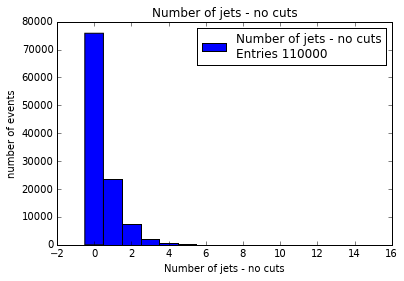

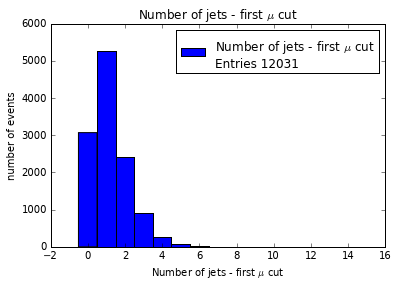

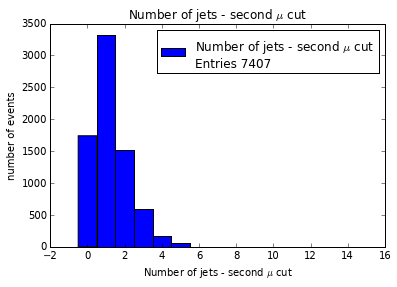

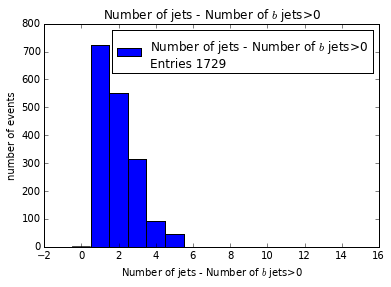

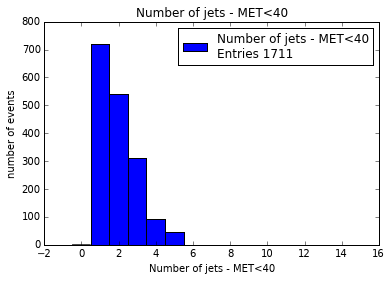

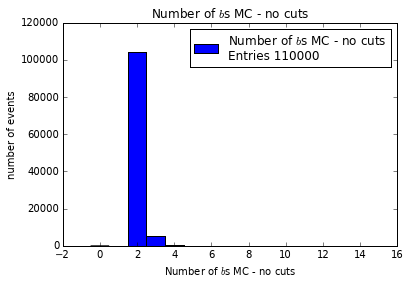

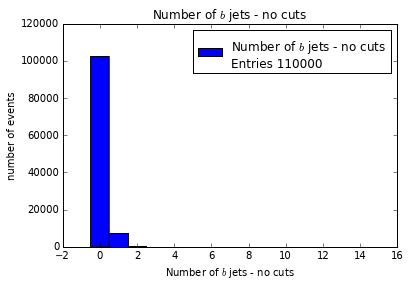

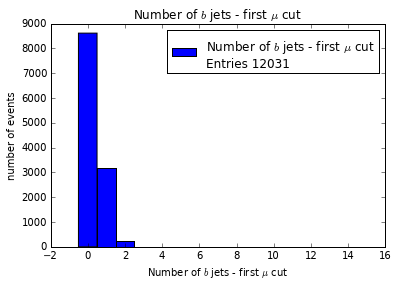

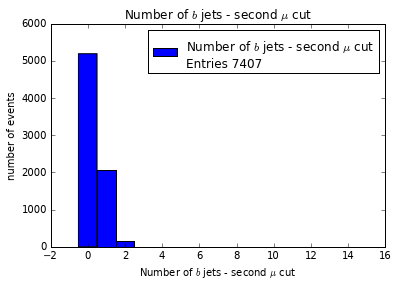

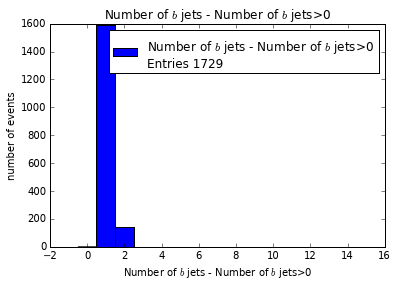

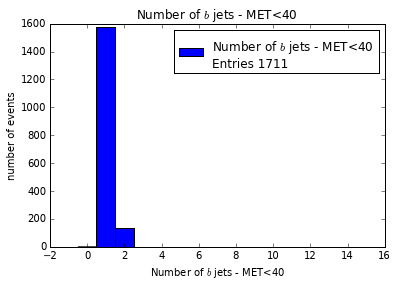

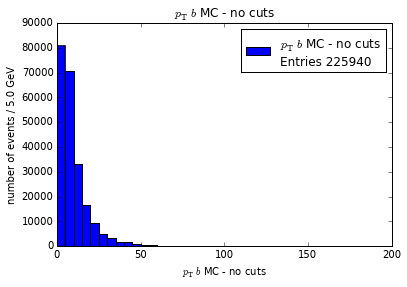

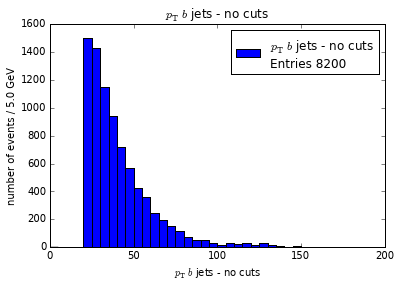

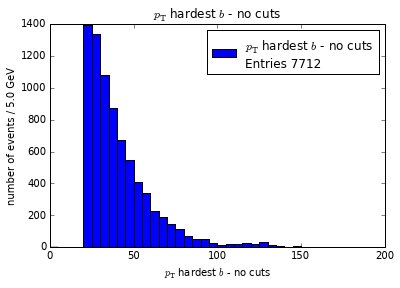

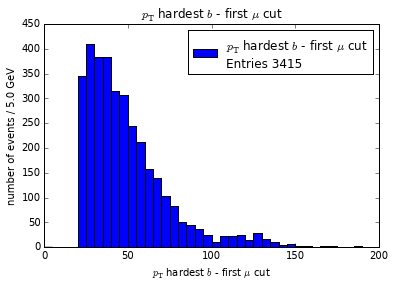

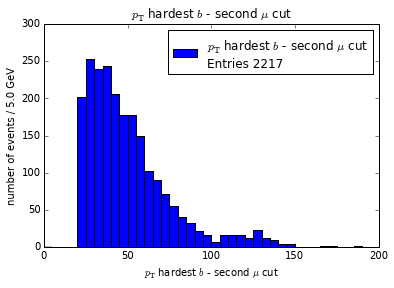

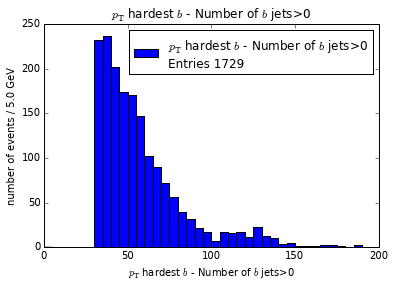

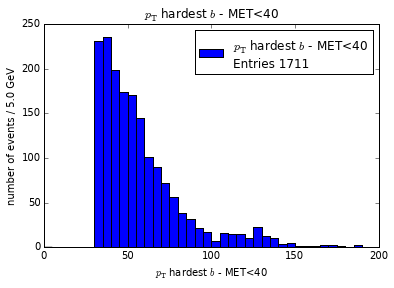

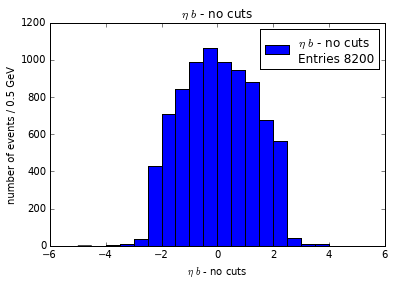

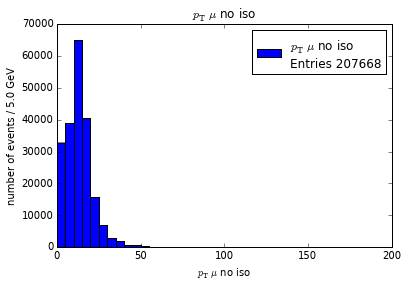

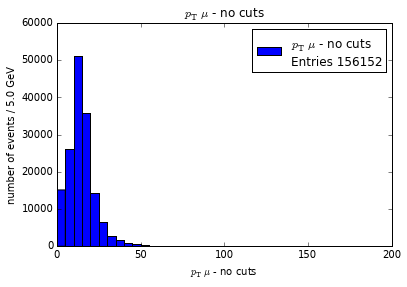

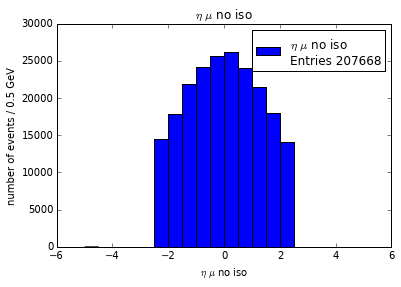

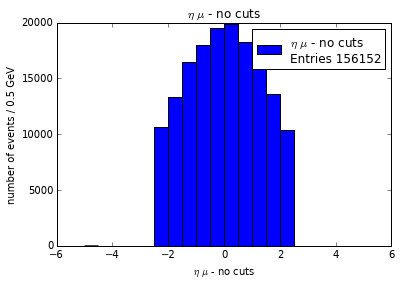

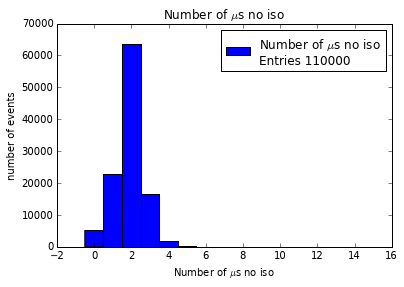

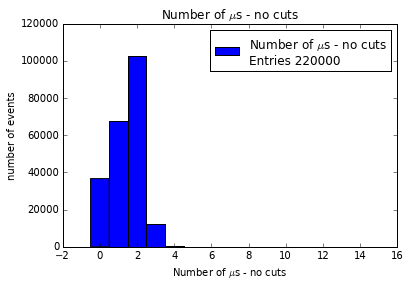

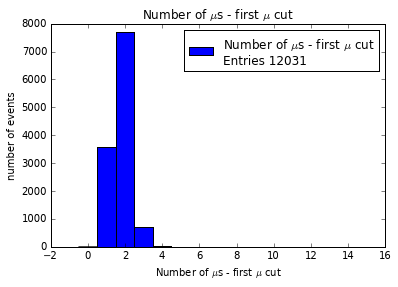

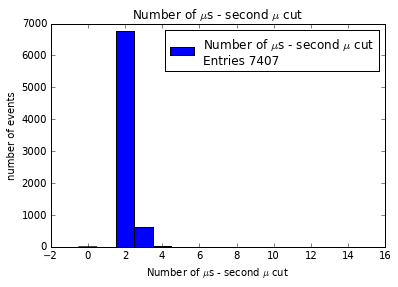

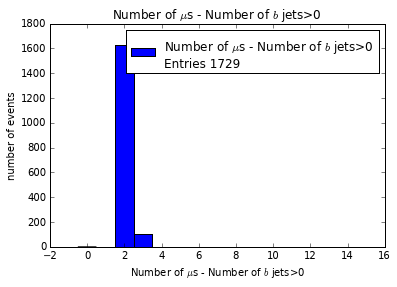

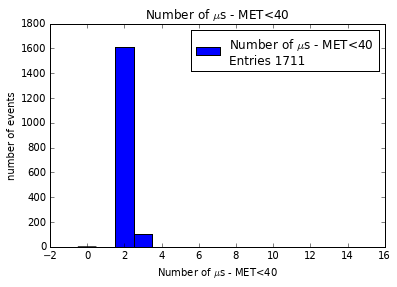

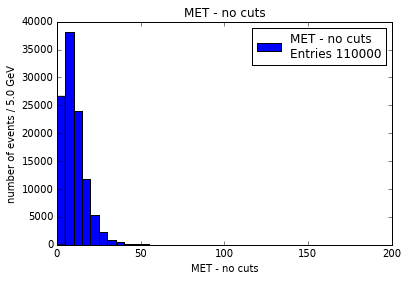

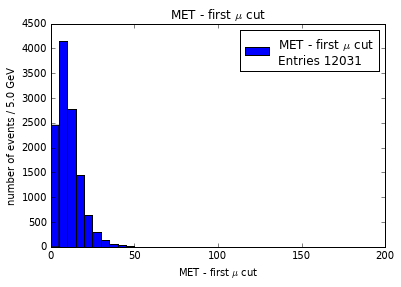

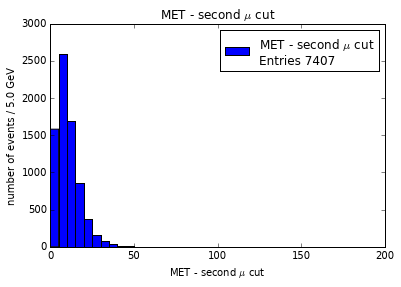

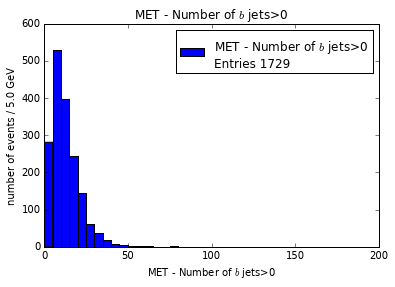

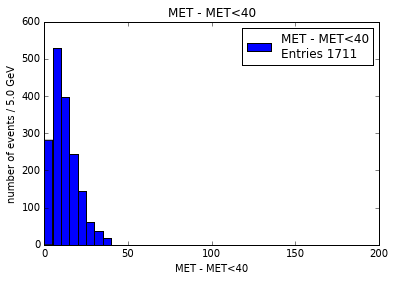

In [55]:
textfile = '/home/jory/bin/madanalysis5/nmssm_bba2mu/Output/delphesma5_btag_fcn60_many/cms_nmssm_bba2mu_0/Histograms/histos.saf'
fopen = open(textfile, 'r')
line  = fopen.readline()
while not '<SAFfooter>' in line:
    line = fopen.readline()
    
    ## Go to next histogram
    while line != '' and not '<Description>' in line:
        line = fopen.readline()
    
    ## Now read the title
    if line == '': break
    line = fopen.readline()
    name = line.strip().strip('"')
    title = name.replace('muon', '$\mu$').replace('b', '$b$').replace('N', 'Number of')
    title = title.replace('_',  ' ').replace('pT', '$p_{\mathrm{T}}$').replace('eta', '$\eta$')
    filename = name.replace('>', 'gt').replace('<', 'lt')
    
    # Now go on and read binning
    line = fopen.readline()
    line = fopen.readline()
    nbins = int(line.split()[0])
    xmin = float(line.split()[1])
    xmax = float(line.split()[2])
    while not line == '' and not 'nevents' in line:
        line = fopen.readline()
    nentries = line.split()[0]
    while not line == '' and not '<Data>' in line:
        line = fopen.readline()
    line = fopen.readline()
    
    data = []
    while not line == '' and not '</Data>' in line:
        if not 'flow' in line:
            data.append(float(line.split()[0]))
        line = fopen.readline()
    steps = (xmax - xmin)/nbins
    x = [xmin + steps/2.0 + steps*i for i in range(nbins)]
    thebins = [xmin + steps*i for i in range(nbins)]
    plt.figure()
    plt.hist(x, bins=thebins, weights=data, label=title + '\nEntries ' + nentries)
    plt.xlabel(title)
    if title.startswith('N'):
        plt.ylabel('number of events')
    else:
        plt.ylabel('number of events / ' + str(steps) + ' GeV')
    plt.legend()
    plt.title(title)
    plt.savefig(filename + '.pdf', bbox_inches='tight')
fopen.close()